In [1]:
# A brief of dataset

In [2]:

'''
The food inspection department conducts regular inspection on food quality for various restaurants in the city. It’s a very 
well documented procedure and over time some good amount of data has been generated out of these inspections. 

The inspection department would like to predict where they should focus most in terms of their next inspection schedule, so 
that they can most optimize their time at hand to catch the worst offenders. Can the past inspection or any data that they have
collected predict which facility will pass or fail.

Build a predictive model that is capable of predicting the outcome of an inspection conducted in a facility based on the given 
set of features

Features : 

ID: A unique id for each inspection

Date: The date at which the inspection was done in a particular facility

LicenseNo: De-identified license number for a particular facility

FacilityID: De-identified unique facility id  for a facility

FacilityName: The encoded name of a facility

Type: The type of the facility being inspected

Street: The encoded street where the facility is located

City: The encoded city where the facility is located

State: The encoded state where the facility is located

LocationID: An encoded location feature.

Reason: The primary reason for the inspection

SectionViolations: Laws violated by the facility

RiskLevel: The level of risk the facility possesses to the consumers.

Geo_Loc: De-identified geo location of the facility

Inspection_Results: The result of the inspection

Target :

The inspection results can have any of the following values :

0:’FACILITY CHANGED’
1:’FAIL’
2:’FURTHER INSPECTION REQUIRED’,
3:’INSPECTION OVERRULED’
4:’PASS’
5:’PASS(CONDITIONAL)’
6:’SHUT-DOWN’


'''

'\nThe food inspection department conducts regular inspection on food quality for various restaurants in the city. It’s a very \nwell documented procedure and over time some good amount of data has been generated out of these inspections. \n\nThe inspection department would like to predict where they should focus most in terms of their next inspection schedule, so \nthat they can most optimize their time at hand to catch the worst offenders. Can the past inspection or any data that they have\ncollected predict which facility will pass or fail.\n\nBuild a predictive model that is capable of predicting the outcome of an inspection conducted in a facility based on the given \nset of features\n\nFeatures : \n\nID: A unique id for each inspection\n\nDate: The date at which the inspection was done in a particular facility\n\nLicenseNo: De-identified license number for a particular facility\n\nFacilityID: De-identified unique facility id  for a facility\n\nFacilityName: The encoded name of a 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,roc_curve, auc ,accuracy_score,cohen_kappa_score,confusion_matrix,classification_report,recall_score,precision_score
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
import sklearn.feature_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from pandas.plotting import scatter_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn.svm import SVR
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.utils import resample
from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [4]:
# Importing train dataset

In [5]:
fd=pd.read_excel("C://Users//acer//Desktop//Intern//Food_quality//Data_Train.xlsx")

In [6]:
# a glance of dataset

In [7]:
fd.head(3)

,ID,Date,LicenseNo,FacilityID,FacilityName,Type,Street,City,State,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,Inspection_Results
0,31103489027986,26-04-2010,4744,8123,7715,RESTAURANT,15522,id-11235901,id_1890134,81876.0,CANVASS,33.0,High,locid16406,4
1,10088999935915,21-06-2009,2973,12268,11664,GROCERY STORE,3057,id-11235901,id_1890134,81862.0,COMPLAINT,33.0,High,locid878,4
2,40148966010272,01-05-2013,18223,1112,969,RESTAURANT,14988,id-11235901,id_1890134,81883.0,CANVASS,NaN,High,locid3368,6


In [8]:
# shape of train dataset

In [9]:
fd.shape

(147443, 15)

In [10]:
# importing test dataset

In [11]:
df=pd.read_excel("C://Users//acer//Desktop//Intern//Food_quality//Data_Test.xlsx")

In [12]:
# shape of test dataset

In [13]:
df.shape

(49148, 15)

In [14]:
# a glance of dataset

In [15]:
df.head(3)

,ID,Date,LicenseNo,FacilityID,FacilityName,Type,Street,City,State,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,Inspection_Results
0,47571900570810,19-03-2014,34218,2354,2185,GROCERY STORE,17352,id-11235901,id_1890134,81864.0,CANVASS,19.0,Low,locid1145,NaN
1,19685766253655,22-11-2010,24597,13183,12516,SCHOOL,15536,id-11235901,id_1890134,81871.0,CANVASS,32.0,High,locid16450,NaN
2,37885701847801,09-06-2014,1779,26434,25220,RESTAURANT,8849,id-11235901,id_1890134,81902.0,CANVASS,NaN,High,locid12916,NaN


In [16]:
# concating both dataset

In [17]:
fd=pd.concat([fd,df],axis=0)

In [18]:
# glance of final dataset

In [19]:
fd.head(3)

,ID,Date,LicenseNo,FacilityID,FacilityName,Type,Street,City,State,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,Inspection_Results
0,31103489027986,26-04-2010,4744,8123,7715,RESTAURANT,15522,id-11235901,id_1890134,81876.0,CANVASS,33.0,High,locid16406,4.0
1,10088999935915,21-06-2009,2973,12268,11664,GROCERY STORE,3057,id-11235901,id_1890134,81862.0,COMPLAINT,33.0,High,locid878,4.0
2,40148966010272,01-05-2013,18223,1112,969,RESTAURANT,14988,id-11235901,id_1890134,81883.0,CANVASS,NaN,High,locid3368,6.0


In [20]:
# shape of final dataset

In [21]:
fd.shape

(196591, 15)

In [22]:
# listing all columns 

In [23]:
fd.columns

Index(['ID', 'Date', 'LicenseNo', 'FacilityID', 'FacilityName', 'Type',
       'Street', 'City', 'State', 'LocationID', 'Reason', 'SectionViolations',
       'RiskLevel', 'Geo_Loc', 'Inspection_Results'],
      dtype='object')

In [24]:
# changing case to lower for easy identification

In [25]:
fd.columns=map(str.lower,fd.columns)

In [26]:
# Listing column data types

In [27]:
fd.dtypes

id                      int64
date                   object
licenseno               int64
facilityid              int64
facilityname            int64
type                   object
street                  int64
city                   object
state                  object
locationid            float64
reason                 object
sectionviolations     float64
risklevel              object
geo_loc                object
inspection_results    float64
dtype: object

In [28]:
# basic stats 

In [29]:
df.describe()

,ID,LicenseNo,FacilityID,FacilityName,Street,LocationID,SectionViolations,Inspection_Results
count,4.914800e+04,49148.000000,49148.000000,49148.000000,49148.000000,49133.000000,36172.000000,0.0
mean,2.992223e+13,17688.656914,13969.417046,13319.277549,8654.251343,81874.023589,24.123576,NaN
std,1.153187e+13,10875.471660,7785.186475,7413.667568,5272.693487,22.858196,12.631510,NaN
min,1.000009e+13,0.000000,0.000000,0.000000,0.000000,81252.000000,1.000000,NaN
25%,1.995199e+13,8525.750000,7347.000000,6993.000000,4027.000000,81859.000000,14.000000,NaN
50%,2.994151e+13,16920.000000,14190.000000,13625.500000,8505.000000,81870.000000,31.000000,NaN
75%,3.990315e+13,26109.000000,20778.000000,19764.000000,13329.250000,81888.000000,33.000000,NaN
max,4.999862e+13,37394.000000,27276.000000,26031.000000,17890.000000,82072.000000,70.000000,NaN


In [30]:
# Each value and its count

In [31]:
fd.groupby("type").size()

type
(CONVENIENCE STORE)                  1
(GAS STATION)                        2
1005 NURSING HOME                    3
1023                                15
1023 CHILDERN'S SERVICE FACILITY    10
                                    ..
WINE STORE                          11
WINE TASTING BAR                     6
WRIGLEY ROOF TOP                    19
WRIGLEY ROOFTOP                     16
YOUTH HOUSING                        3
Length: 435, dtype: int64

In [32]:
fd.groupby("reason").size()

reason
CANVASS                                   104077
CANVASS RE-INSPECTION                      20798
COMPLAINT                                  18214
COMPLAINT RE-INSPECTION                     7577
COMPLAINT-FIRE                               160
CONSULTATION                                 666
LICENSE                                    26038
LICENSE RE-INSPECTION                       9038
LICENSE-TASK FORCE                           605
OUT OF BUSINESS                              305
RECENT INSPECTION                            337
SHORT FORM COMPLAINT                        6764
SHORT FORM FIRE-COMPLAINT                    113
SUSPECTED FOOD POISONING                     853
SUSPECTED FOOD POISONING RE-INSPECTION       191
TAG REMOVAL                                  603
TASK FORCE LIQUOR 1475                       252
dtype: int64

In [33]:
fd.risklevel.value_counts()

High         141076
Medium        38374
Low           17110
Uncertain        31
Name: risklevel, dtype: int64

In [34]:
# Looking at null values

In [35]:
fd.isna().sum()

id                        0
date                      0
licenseno                 0
facilityid                0
facilityname              0
type                   4700
street                    0
city                      0
state                     0
locationid               50
reason                    0
sectionviolations     52044
risklevel                 0
geo_loc                   0
inspection_results    49148
dtype: int64

In [36]:
# Feature engineering

In [37]:
# id

In [38]:
fd.id.dtypes

dtype('int64')

In [39]:
fd.id.isna().sum()

0

In [40]:
# date

In [41]:
fd.date.dtype

dtype('O')

In [42]:
fd.date.isna().sum()

0

In [43]:
# converting to datetime datatype

In [44]:
fd["date"]=pd.to_datetime(fd["date"],errors='coerce')

In [45]:
# slicing day from date

In [46]:
fd["day"]=fd.date.dt.day

In [47]:
fd.day.head(2)

0    26.0
1    21.0
Name: day, dtype: float64

In [48]:
fd.day.isna().sum()

68

In [49]:
fd.day.fillna(fd.day.mean(),inplace=True)

In [50]:
fd.day=fd.day.astype(int)

In [51]:
fd.day.unique()

array([26, 21,  5, 28, 12,  2,  4, 16,  8, 23, 31, 19,  1, 29,  9, 30, 18,
       24,  3, 13, 10, 22, 14, 25, 11, 27, 20,  7, 17,  6, 15],
      dtype=int64)

In [52]:
# slicing month

In [53]:
fd["month"]=fd.date.dt.month

In [54]:
# Looking at null values in month 

In [55]:
fd.month.isna().sum()

68

In [56]:
# data type 

In [57]:
fd.month.dtype

dtype('float64')

In [58]:
# imputing mean values of month 

In [59]:
fd.month.fillna(fd.month.mean(),inplace=True)

In [60]:
# converting to integer to round off all values

In [61]:
fd.month=fd.month.astype(int)

In [62]:
# cross checking 

In [63]:
fd.month.isna().sum()

0

In [64]:
fd["year"]=fd.date.dt.year

In [65]:
fd.year.isna().sum()

68

In [66]:
fd.year.fillna(fd.year.mean(),inplace=True)

In [67]:
fd.year=fd.year.astype(int)

In [68]:
fd.year.isna().sum()

0

In [69]:
# dropping date col 

In [70]:
fd.drop("date",axis=1,inplace=True)

In [71]:
# Licenseno

In [72]:
fd.licenseno.dtype

dtype('int64')

In [73]:
fd.licenseno.isna().sum()

0

In [74]:
# facilityid

In [75]:
fd.facilityid.dtype

dtype('int64')

In [76]:
fd.facilityid.isna().sum()

0

In [77]:
# facilityname

In [78]:
fd.facilityname.dtype

dtype('int64')

In [79]:
fd.facilityname.isna().sum()

0

In [80]:
# type

In [81]:
fd.type.dtype

dtype('O')

In [82]:
fd.type.isna().sum()

4700

In [83]:
fd.type.value_counts().sort_values(ascending=False)

RESTAURANT                      131182
GROCERY STORE                    25012
SCHOOL                           12149
CHILDREN'S SERVICES FACILITY      3122
BAKERY                            2882
                                 ...  
MOBIL FOOD 1315                      1
ROOFTOP PATIO                        1
SERVICE BAR/THEATRE                  1
SERVICE GAS STATION                  1
COMMIASARY                           1
Name: type, Length: 435, dtype: int64

In [84]:
len(fd.type.unique())

436

In [85]:
# imputing mode inplace of null values

In [86]:
fd["type"]=fd["type"].fillna(fd.type.value_counts().index[0])

In [87]:
fd.type.isna().sum()

0

In [88]:
# Label encoding to type variable

In [89]:
le=LabelEncoder()
fd["type"]=le.fit_transform(fd["type"])

In [90]:
fd.type.dtype

dtype('int32')

In [91]:
# street

In [92]:
fd.street.dtype

dtype('int64')

In [93]:
fd.street.isna().sum()

0

In [94]:
# city

In [95]:
fd.city.dtype

dtype('O')

In [96]:
fd.city.head(2)

0    id-11235901
1    id-11235901
Name: city, dtype: object

In [97]:
fd.city.isna().sum()

0

In [98]:
# splitting character and numbers

In [99]:
fd[["unknownid","cityid"]]=fd["city"].str.split("-",expand=True)

In [100]:
# dropping unknownid and city col created just now

In [101]:
fd.drop("unknownid",axis=1,inplace=True)

In [102]:
fd.drop("city",axis=1,inplace=True)

In [103]:
# changing data type from object to int

In [104]:
fd.cityid=fd.cityid.astype(int)

In [105]:
# state

In [106]:
fd.state.dtype

dtype('O')

In [107]:
fd.state.isna().sum()

0

In [108]:
fd.state.head(2)

0    id_1890134
1    id_1890134
Name: state, dtype: object

In [109]:
# splitting into 2 columns

In [110]:
fd[["unknownid","stateid"]]=fd.state.str.split("_",expand=True)

In [111]:
# dropping unknownid and state col

In [112]:
fd.drop("unknownid",axis=1,inplace=True)

In [113]:
fd.drop("state",axis=1,inplace=True)

In [114]:
fd.stateid.dtype

dtype('O')

In [115]:
# changing datatype to int

In [116]:
fd.stateid=fd.stateid.astype(int)

In [117]:
# Locationid

In [118]:
fd.locationid.head(2)

0    81876.0
1    81862.0
Name: locationid, dtype: float64

In [119]:
fd.locationid.dtype

dtype('float64')

In [120]:
fd.locationid.isna().sum()

50

In [121]:
fd.locationid.fillna(fd.locationid.mean(),inplace=True)

In [122]:
fd.locationid.isna().sum()

0

In [123]:
fd.locationid=fd.locationid.astype(int)

In [124]:
# reason

In [125]:
fd.reason.dtype

dtype('O')

In [126]:
fd.reason.isna().sum()

0

In [127]:
fd.reason.head(2)

0      CANVASS
1    COMPLAINT
Name: reason, dtype: object

In [128]:
len(fd.reason.unique())

17

In [129]:
fd.reason.value_counts()

CANVASS                                   104077
LICENSE                                    26038
CANVASS RE-INSPECTION                      20798
COMPLAINT                                  18214
LICENSE RE-INSPECTION                       9038
COMPLAINT RE-INSPECTION                     7577
SHORT FORM COMPLAINT                        6764
SUSPECTED FOOD POISONING                     853
CONSULTATION                                 666
LICENSE-TASK FORCE                           605
TAG REMOVAL                                  603
RECENT INSPECTION                            337
OUT OF BUSINESS                              305
TASK FORCE LIQUOR 1475                       252
SUSPECTED FOOD POISONING RE-INSPECTION       191
COMPLAINT-FIRE                               160
SHORT FORM FIRE-COMPLAINT                    113
Name: reason, dtype: int64

In [130]:
# applying label encoding

In [131]:
le=LabelEncoder()
fd["reason"]=le.fit_transform(fd["reason"])

In [132]:
# sectionviolations

In [133]:
fd.sectionviolations.head(2)

0    33.0
1    33.0
Name: sectionviolations, dtype: float64

In [134]:
fd.sectionviolations.dtype

dtype('float64')

In [135]:
fd.sectionviolations.isna().sum()

52044

In [136]:
# checking whether null values exceeds 30% of total rows

In [137]:
52044/196591*100

26.473236312954306

In [138]:
fd.sectionviolations.fillna(fd.sectionviolations.mean(),inplace=True)

In [139]:
fd.sectionviolations.isna().sum()

0

In [140]:
fd.sectionviolations=fd.sectionviolations.astype(int)

In [141]:
# risklevel

In [142]:
fd.risklevel.head(2)

0    High
1    High
Name: risklevel, dtype: object

In [143]:
fd.risklevel.isna().sum()

0

In [144]:
fd.risklevel.dtype

dtype('O')

In [145]:
fd.risklevel.value_counts()

High         141076
Medium        38374
Low           17110
Uncertain        31
Name: risklevel, dtype: int64

In [146]:
# applying one hot encoding

In [147]:
fd=pd.get_dummies(fd, columns=["risklevel"])

In [148]:
# dropping risklevel_uncertain

In [149]:
fd.drop("risklevel_Uncertain",axis=1,inplace=True)

In [150]:
# geo_loc

In [151]:
fd.geo_loc.dtype

dtype('O')

In [152]:
fd.geo_loc.head(2)

0    locid16406
1      locid878
Name: geo_loc, dtype: object

In [153]:
fd.geo_loc.isna().sum()

0

In [154]:
fd[["unknownid","geoloc_id"]]=fd.geo_loc.str.split("d",expand=True)

In [155]:
fd.drop("unknownid",axis=1,inplace=True)

In [156]:
fd.geoloc_id.isna().sum()

0

In [157]:
fd.geoloc_id.dtype

dtype('O')

In [158]:
fd.geoloc_id=fd.geoloc_id.astype(int)

In [159]:
fd.geoloc_id.dtype

dtype('int32')

In [160]:
# dropping geo_loc col

In [161]:
fd.drop("geo_loc",axis=1,inplace=True)

In [162]:
# Everything looks perfect, lets see our data

In [163]:
fd.head(3)

,id,licenseno,facilityid,facilityname,type,street,locationid,reason,sectionviolations,inspection_results,day,month,year,cityid,stateid,risklevel_High,risklevel_Low,risklevel_Medium,geoloc_id
0,31103489027986,4744,8123,7715,344,15522,81876,0,33,4.0,26,4,2010,11235901,1890134,1,0,0,16406
1,10088999935915,2973,12268,11664,185,3057,81862,2,33,4.0,21,6,2009,11235901,1890134,1,0,0,878
2,40148966010272,18223,1112,969,344,14988,81883,0,24,6.0,5,1,2013,11235901,1890134,1,0,0,3368


In [164]:
fd.dtypes

id                      int64
licenseno               int64
facilityid              int64
facilityname            int64
type                    int32
street                  int64
locationid              int32
reason                  int32
sectionviolations       int32
inspection_results    float64
day                     int32
month                   int32
year                    int32
cityid                  int32
stateid                 int32
risklevel_High          uint8
risklevel_Low           uint8
risklevel_Medium        uint8
geoloc_id               int32
dtype: object

In [165]:
# divide our data and take out test data

In [166]:
train=fd.iloc[:147443]

In [167]:
train.isna().sum()

id                    0
licenseno             0
facilityid            0
facilityname          0
type                  0
street                0
locationid            0
reason                0
sectionviolations     0
inspection_results    0
day                   0
month                 0
year                  0
cityid                0
stateid               0
risklevel_High        0
risklevel_Low         0
risklevel_Medium      0
geoloc_id             0
dtype: int64

In [168]:
test=fd.iloc[147443:]

In [169]:
test.isna().sum()

id                        0
licenseno                 0
facilityid                0
facilityname              0
type                      0
street                    0
locationid                0
reason                    0
sectionviolations         0
inspection_results    49148
day                       0
month                     0
year                      0
cityid                    0
stateid                   0
risklevel_High            0
risklevel_Low             0
risklevel_Medium          0
geoloc_id                 0
dtype: int64

In [170]:
# Data Visualization for train dataset

In [171]:
# glance of train dataset

In [172]:
train.head(3)

,id,licenseno,facilityid,facilityname,type,street,locationid,reason,sectionviolations,inspection_results,day,month,year,cityid,stateid,risklevel_High,risklevel_Low,risklevel_Medium,geoloc_id
0,31103489027986,4744,8123,7715,344,15522,81876,0,33,4.0,26,4,2010,11235901,1890134,1,0,0,16406
1,10088999935915,2973,12268,11664,185,3057,81862,2,33,4.0,21,6,2009,11235901,1890134,1,0,0,878
2,40148966010272,18223,1112,969,344,14988,81883,0,24,6.0,5,1,2013,11235901,1890134,1,0,0,3368


In [173]:
# countplot

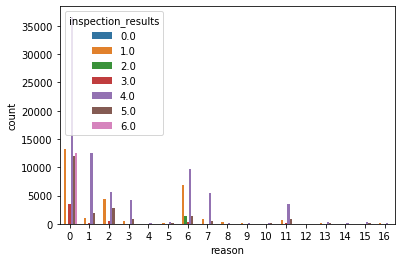

In [174]:
sns.countplot(x="reason",hue="inspection_results",data=train)

In [175]:
# barplot

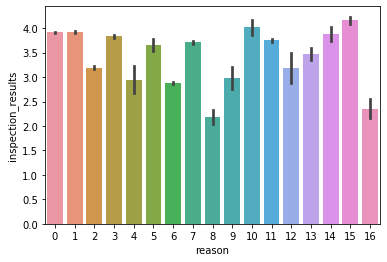

In [176]:
sns.barplot(x="reason",y="inspection_results",data=train)

In [177]:
# pair plot

In [178]:
# sns.pairplot(train,hue="inspection_results")

In [179]:
# histogram

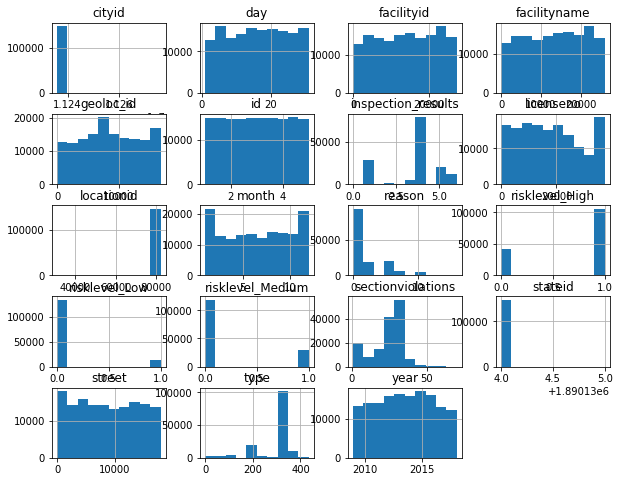

In [180]:
train.hist(figsize=(10,8))
plt.show()

In [181]:
# heatmap

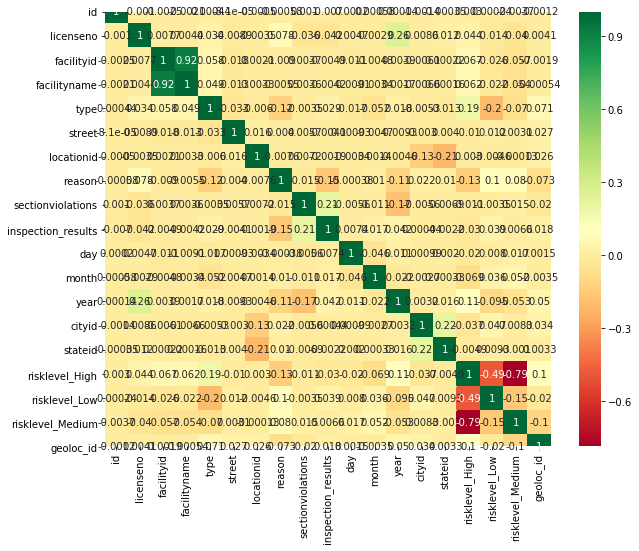

In [182]:
fig=plt.figure(figsize=(10,8))
train_corr=train.corr()
sns.heatmap(train_corr,annot=True,cmap="RdYlGn")

In [183]:
# dividing dataset into dependent and independent variables

In [242]:
y=train["inspection_results"]
x=train.drop("inspection_results",axis=1)

In [185]:
# Important features using extratrees

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[4.40865209e-02 5.04765351e-02 3.94961172e-02 3.97280449e-02
 2.49912935e-02 4.14078361e-02 3.90916987e-02 7.96551536e-02
 4.49725786e-01 4.47567264e-02 3.87564446e-02 4.92547033e-02
 4.11658062e-04 6.86256219e-05 2.64693467e-03 8.32923463e-03
 2.55280379e-03 4.45638833e-02]


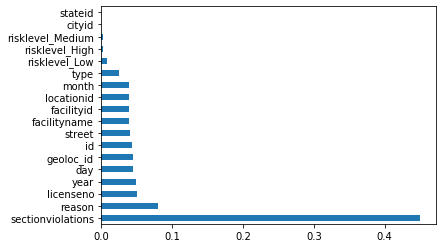

In [186]:
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(18).plot(kind='barh')
plt.show()

In [187]:
# using chi2

In [188]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=18)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
#dfscores=round(dfscores,2)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(18,'Score'))  #print 10 best features

                Specs         Score
0                  id  5.761564e+13
1           licenseno  1.453513e+07
17          geoloc_id  1.008604e+06
8   sectionviolations  4.509922e+05
2          facilityid  2.182215e+05
3        facilityname  1.104402e+05
5              street  8.906402e+04
7              reason  4.447119e+04
4                type  7.002443e+03
15      risklevel_Low  5.759702e+03
14     risklevel_High  1.027132e+03
10              month  5.154631e+02
9                 day  2.276005e+02
16   risklevel_Medium  1.766958e+02
11               year  3.979678e+01
12             cityid  2.799446e+01
6          locationid  2.230661e+00
13            stateid  3.502542e-09


In [189]:
# checking for multi collinearity using vif

In [190]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
print(vif)

      VIF Factor           features
0   1.000045e+00                 id
1   1.087878e+00          licenseno
2   6.349124e+00         facilityid
3   6.339466e+00       facilityname
4   1.072791e+00               type
5   1.002699e+00             street
6   1.019801e+00         locationid
7   1.057613e+00             reason
8   1.033187e+00  sectionviolations
9   1.003240e+00                day
10  1.009376e+00              month
11  1.138353e+00               year
12  1.023130e+00             cityid
13  3.909782e-09            stateid
14  1.423960e+03     risklevel_High
15  5.590497e+02      risklevel_Low
16  1.104862e+03   risklevel_Medium
17  1.024245e+00          geoloc_id


In [243]:
y=y.astype(int)

In [192]:
# Dividing dataset into train test split

In [193]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [194]:
# Printing the shape of splitted dataset

In [195]:
print("shape of x_train is:",x_train.shape)
print("shape of y_train is:",y_train.shape)
print("shape of x_test is:",x_test.shape)
print("shape of y_test is:",y_test.shape)

shape of x_train is: (103210, 18)
shape of y_train is: (103210,)
shape of x_test is: (44233, 18)
shape of y_test is: (44233,)


In [196]:
# Lets apply ML algo and see which result best

In [197]:
lda=LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
prediction=lda.predict(x_test)

In [198]:
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)

        Act  Predicted
109354    1          5
63473     1          1
98966     5          5
4272      4          4
96436     1          1
...     ...        ...
54993     4          4
61339     1          1
54580     6          6
129462    4          4
68159     6          4

[44233 rows x 2 columns]


In [199]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction,pos_label="positive",average="micro"))
print("Precision is :",precision_score(y_test, prediction,pos_label="positive",average="micro"))
print("R2 score is:",r2_score(y_test,prediction))
# fpr, tpr, thresholds = roc_curve(y_test,prediction)
# print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.7219270680261344
Kappa is : 0.5205209063043994
Sensitiviy is : 0.7219270680261344
Precision is : 0.7219270680261344
R2 score is: 0.000748723570983878
array([[    0,     0,     1,     0,    12,     0,     3],
       [   10,  4022,    15,     0,  1876,  2397,   238],
       [    4,     0,     3,     0,   426,     6,     4],
       [    2,    33,     2,     0,  1417,     6,    37],
       [   42,    40,    30,     0, 23091,    99,   356],
       [   10,  1009,    13,     0,  1308,  3804,    70],
       [    9,     2,     0,     0,  2823,     0,  1013]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.00      0.00      0.00        16\n'
 '           1       0.79      0.47      0.59      8558\n'
 '           2       0.05      0.01      0.01       443\n'
 '           3       0.00      0.00      0.00      1497\n'
 '           4       0.75      0.98      0.85     23658\n'
 '           5       0.60      0.61      0.61     

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [200]:
# Using many different methods to see which one best fits data

In [201]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
prediction=lr.predict(x_test)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [202]:
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)

        Act  Predicted
109354    1          4
63473     1          4
98966     5          4
4272      4          4
96436     1          4
...     ...        ...
54993     4          4
61339     1          4
54580     6          4
129462    4          4
68159     6          4

[44233 rows x 2 columns]


In [203]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction,pos_label="positive",average="micro"))
print("Precision is :",precision_score(y_test, prediction,pos_label="positive",average="micro"))
print("R2 score is:",r2_score(y_test,prediction))
# fpr, tpr, thresholds = roc_curve(y_test,prediction)
# print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.5348495467185134
Kappa is : 0.0
Sensitiviy is : 0.5348495467185134
Precision is : 0.5348495467185134
R2 score is: -0.0468009992508136
array([[    0,     0,     0,     0,    16,     0,     0],
       [    0,     0,     0,     0,  8558,     0,     0],
       [    0,     0,     0,     0,   443,     0,     0],
       [    0,     0,     0,     0,  1497,     0,     0],
       [    0,     0,     0,     0, 23658,     0,     0],
       [    0,     0,     0,     0,  6214,     0,     0],
       [    0,     0,     0,     0,  3847,     0,     0]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.00      0.00      0.00        16\n'
 '           1       0.00      0.00      0.00      8558\n'
 '           2       0.00      0.00      0.00       443\n'
 '           3       0.00      0.00      0.00      1497\n'
 '           4       0.53      1.00      0.70     23658\n'
 '           5       0.00      0.00      0.00      6214\n'
 '     

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [204]:
qda=QuadraticDiscriminantAnalysis()
qda.fit(x_train,y_train)
prediction=qda.predict(x_test)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [205]:
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)

        Act  Predicted
109354    1          4
63473     1          3
98966     5          4
4272      4          4
96436     1          4
...     ...        ...
54993     4          4
61339     1          4
54580     6          0
129462    4          4
68159     6          0

[44233 rows x 2 columns]


In [206]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction,pos_label="positive",average="micro"))
print("Precision is :",precision_score(y_test, prediction,pos_label="positive",average="micro"))
print("R2 score is:",r2_score(y_test,prediction))
# fpr, tpr, thresholds = roc_curve(y_test,prediction)
# print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.4569439106549409
Kappa is : 0.17574517561210512
Sensitiviy is : 0.4569439106549409
Precision is : 0.4569439106549409
R2 score is: -2.0237422122775826
array([[   14,     0,     1,     0,     1,     0,     0],
       [  693,     4,    11,   373,  5212,  2265,     0],
       [  386,     0,     5,     0,    49,     3,     0],
       [ 1147,     0,     3,   154,   177,    16,     0],
       [ 4365,    17,    38,  1566, 17591,    81,     0],
       [  111,     2,    12,   199,  3446,  2444,     0],
       [ 3158,     1,     3,   389,   286,    10,     0]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.00      0.88      0.00        16\n'
 '           1       0.17      0.00      0.00      8558\n'
 '           2       0.07      0.01      0.02       443\n'
 '           3       0.06      0.10      0.07      1497\n'
 '           4       0.66      0.74      0.70     23658\n'
 '           5       0.51      0.39      0.44     

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [207]:
dt=DecisionTreeClassifier(criterion="entropy",max_depth=20)
dt.fit(x_train,y_train)
prediction=dt.predict(x_test)

In [208]:
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)

        Act  Predicted
109354    1          1
63473     1          1
98966     5          5
4272      4          4
96436     1          1
...     ...        ...
54993     4          4
61339     1          1
54580     6          6
129462    4          4
68159     6          6

[44233 rows x 2 columns]


In [209]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction,pos_label="positive",average="micro"))
print("Precision is :",precision_score(y_test, prediction,pos_label="positive",average="micro"))
print("R2 score is:",r2_score(y_test,prediction))
# fpr, tpr, thresholds = roc_curve(y_test,prediction)
# print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.8123346822508082
Kappa is : 0.7099221102381852
Sensitiviy is : 0.8123346822508082
Precision is : 0.8123346822508082
R2 score is: 0.05432414402623309
array([[    0,     1,     1,     1,     4,     0,     9],
       [    1,  5770,    33,    74,   603,  1944,   133],
       [    0,    37,   206,    22,   157,    15,     6],
       [    0,    64,    34,   598,   199,    15,   587],
       [    2,   453,   139,   172, 22330,   247,   315],
       [    0,  1819,    22,    23,   219,  4116,    15],
       [    3,   126,     3,   502,   282,    19,  2912]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.00      0.00      0.00        16\n'
 '           1       0.70      0.67      0.69      8558\n'
 '           2       0.47      0.47      0.47       443\n'
 '           3       0.43      0.40      0.41      1497\n'
 '           4       0.94      0.94      0.94     23658\n'
 '           5       0.65      0.66      0.65      

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [210]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
prediction=rf.predict(x_test)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [211]:
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)

        Act  Predicted
109354    1          1
63473     1          1
98966     5          5
4272      4          4
96436     1          1
...     ...        ...
54993     4          4
61339     1          1
54580     6          6
129462    4          4
68159     6          6

[44233 rows x 2 columns]


In [212]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction,pos_label="positive",average="micro"))
print("Precision is :",precision_score(y_test, prediction,pos_label="positive",average="micro"))
print("R2 score is:",r2_score(y_test,prediction))
# fpr, tpr, thresholds = roc_curve(y_test,prediction)
# print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.8353265661384035
Kappa is : 0.7431072666181019
Sensitiviy is : 0.8353265661384035
Precision is : 0.8353265661384035
R2 score is: 0.16180291405964042
array([[    0,     0,     0,     2,     6,     0,     8],
       [    0,  6196,    30,    27,   659,  1500,   146],
       [    0,    19,   188,     6,   218,     5,     7],
       [    0,    72,    30,   535,   265,    12,   583],
       [    0,   290,   105,    79, 22772,    76,   336],
       [    0,  1904,    23,     8,   238,  4016,    25],
       [    1,    46,     1,   363,   194,     0,  3242]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.00      0.00      0.00        16\n'
 '           1       0.73      0.72      0.73      8558\n'
 '           2       0.50      0.42      0.46       443\n'
 '           3       0.52      0.36      0.43      1497\n'
 '           4       0.94      0.96      0.95     23658\n'
 '           5       0.72      0.65      0.68      

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [213]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)

In [214]:
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)

        Act  Predicted
109354    1          4
63473     1          4
98966     5          4
4272      4          4
96436     1          4
...     ...        ...
54993     4          4
61339     1          4
54580     6          4
129462    4          4
68159     6          4

[44233 rows x 2 columns]


In [215]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction,pos_label="positive",average="micro"))
print("Precision is :",precision_score(y_test, prediction,pos_label="positive",average="micro"))
print("R2 score is:",r2_score(y_test,prediction))
# fpr, tpr, thresholds = roc_curve(y_test,prediction)
# print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.44421585693938914
Kappa is : 0.004925708193721845
Sensitiviy is : 0.44421585693938914
Precision is : 0.44421585693938914
R2 score is: -0.7316502290908766
array([[    0,     5,     0,     0,    10,     1,     0],
       [    1,  1668,     4,    67,  6318,   362,   138],
       [    0,    84,     0,     6,   316,    30,     7],
       [    0,   282,     1,    13,  1104,    76,    21],
       [    2,  4488,    24,   155, 17629,   986,   374],
       [    1,  1191,     4,    45,  4615,   267,    91],
       [    0,   764,     3,    22,  2819,   167,    72]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.00      0.00      0.00        16\n'
 '           1       0.20      0.19      0.20      8558\n'
 '           2       0.00      0.00      0.00       443\n'
 '           3       0.04      0.01      0.01      1497\n'
 '           4       0.54      0.75      0.62     23658\n'
 '           5       0.14      0.04      0.07 

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [216]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)
prediction=bc.predict(x_test)

In [217]:
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)

        Act  Predicted
109354    1          1
63473     1          1
98966     5          5
4272      4          4
96436     1          1
...     ...        ...
54993     4          4
61339     1          1
54580     6          6
129462    4          4
68159     6          6

[44233 rows x 2 columns]


In [218]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction,pos_label="positive",average="micro"))
print("Precision is :",precision_score(y_test, prediction,pos_label="positive",average="micro"))
print("R2 score is:",r2_score(y_test,prediction))
# fpr, tpr, thresholds = roc_curve(y_test,prediction)
# print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.8390794203422783
Kappa is : 0.7508466852981881
Sensitiviy is : 0.8390794203422783
Precision is : 0.8390794203422783
R2 score is: 0.1671010189516381
array([[    1,     0,     1,     2,     3,     0,     9],
       [    0,  6197,    31,    50,   515,  1628,   137],
       [    0,    20,   244,    10,   158,     8,     3],
       [    0,    65,    30,   663,   173,     9,   557],
       [    0,   356,   131,   115, 22652,   111,   293],
       [    0,  1832,    20,    11,   189,  4147,    15],
       [    0,    40,     0,   401,   193,     2,  3211]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       1.00      0.06      0.12        16\n'
 '           1       0.73      0.72      0.73      8558\n'
 '           2       0.53      0.55      0.54       443\n'
 '           3       0.53      0.44      0.48      1497\n'
 '           4       0.95      0.96      0.95     23658\n'
 '           5       0.70      0.67      0.68      6

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [219]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
prediction=etc.predict(x_test)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [220]:
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)

        Act  Predicted
109354    1          1
63473     1          1
98966     5          1
4272      4          4
96436     1          1
...     ...        ...
54993     4          4
61339     1          1
54580     6          6
129462    4          4
68159     6          6

[44233 rows x 2 columns]


In [221]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction,pos_label="positive",average="micro"))
print("Precision is :",precision_score(y_test, prediction,pos_label="positive",average="micro"))
print("R2 score is:",r2_score(y_test,prediction))
# fpr, tpr, thresholds = roc_curve(y_test,prediction)
# print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.8061402120588701
Kappa is : 0.6920460878442501
Sensitiviy is : 0.8061402120588701
Precision is : 0.8061402120588701
R2 score is: 0.07186835210186171
array([[    0,     1,     0,     1,     6,     0,     8],
       [    0,  5644,    15,    24,  1159,  1588,   128],
       [    0,    29,   163,     4,   235,    11,     1],
       [    0,    90,    24,   514,   376,    18,   475],
       [    0,   350,    87,    67, 22807,    91,   256],
       [    0,  1950,    22,    22,   481,  3689,    50],
       [    0,   112,     0,   361,   517,    16,  2841]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.00      0.00      0.00        16\n'
 '           1       0.69      0.66      0.67      8558\n'
 '           2       0.52      0.37      0.43       443\n'
 '           3       0.52      0.34      0.41      1497\n'
 '           4       0.89      0.96      0.93     23658\n'
 '           5       0.68      0.59      0.63      

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [222]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
prediction=gnb.predict(x_test)

In [223]:
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)

        Act  Predicted
109354    1          4
63473     1          4
98966     5          4
4272      4          4
96436     1          4
...     ...        ...
54993     4          4
61339     1          4
54580     6          4
129462    4          4
68159     6          4

[44233 rows x 2 columns]


In [224]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction,pos_label="positive",average="micro"))
print("Precision is :",precision_score(y_test, prediction,pos_label="positive",average="micro"))
print("R2 score is:",r2_score(y_test,prediction))
# fpr, tpr, thresholds = roc_curve(y_test,prediction)
# print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.5348495467185134
Kappa is : 0.0
Sensitiviy is : 0.5348495467185134
Precision is : 0.5348495467185134
R2 score is: -0.0468009992508136
array([[    0,     0,     0,     0,    16,     0,     0],
       [    0,     0,     0,     0,  8558,     0,     0],
       [    0,     0,     0,     0,   443,     0,     0],
       [    0,     0,     0,     0,  1497,     0,     0],
       [    0,     0,     0,     0, 23658,     0,     0],
       [    0,     0,     0,     0,  6214,     0,     0],
       [    0,     0,     0,     0,  3847,     0,     0]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.00      0.00      0.00        16\n'
 '           1       0.00      0.00      0.00      8558\n'
 '           2       0.00      0.00      0.00       443\n'
 '           3       0.00      0.00      0.00      1497\n'
 '           4       0.53      1.00      0.70     23658\n'
 '           5       0.00      0.00      0.00      6214\n'
 '     

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [225]:
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
prediction=sgd.predict(x_test)

In [226]:
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)

        Act  Predicted
109354    1          5
63473     1          5
98966     5          5
4272      4          5
96436     1          5
...     ...        ...
54993     4          5
61339     1          5
54580     6          5
129462    4          5
68159     6          5

[44233 rows x 2 columns]


In [227]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction,pos_label="positive",average="micro"))
print("Precision is :",precision_score(y_test, prediction,pos_label="positive",average="micro"))
print("R2 score is:",r2_score(y_test,prediction))
# fpr, tpr, thresholds = roc_curve(y_test,prediction)
# print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.14048334953541475
Kappa is : 0.0
Sensitiviy is : 0.14048334953541475
Precision is : 0.14048334953541475
R2 score is: -0.7913948161708504
array([[    0,     0,     0,     0,     0,    16,     0],
       [    0,     0,     0,     0,     0,  8558,     0],
       [    0,     0,     0,     0,     0,   443,     0],
       [    0,     0,     0,     0,     0,  1497,     0],
       [    0,     0,     0,     0,     0, 23658,     0],
       [    0,     0,     0,     0,     0,  6214,     0],
       [    0,     0,     0,     0,     0,  3847,     0]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.00      0.00      0.00        16\n'
 '           1       0.00      0.00      0.00      8558\n'
 '           2       0.00      0.00      0.00       443\n'
 '           3       0.00      0.00      0.00      1497\n'
 '           4       0.00      0.00      0.00     23658\n'
 '           5       0.14      1.00      0.25      6214\n'
 '  

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [228]:
# Using cross validation 

LR: 0.538873 (0.000050)
LDA: 0.725399 (0.002873)
KNN: 0.441832 (0.002365)
CART: 0.809181 (0.002867)
NB: 0.538873 (0.000050)


c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\acer\appdata\local\programs\python\python36\li

QDA: 0.496970 (0.119943)
DT: 0.808679 (0.002862)


c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.

RF: 0.838541 (0.002788)
KNN: 0.441832 (0.002365)
BC: 0.842712 (0.002050)


c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.

ETC: 0.813684 (0.003657)
SGD: 0.275527 (0.173788)


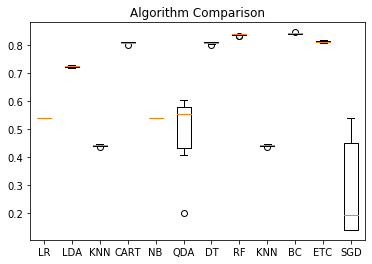

In [232]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('BC', BaggingClassifier()))
models.append(('ETC', ExtraTreesClassifier()))
models.append(('SGD', SGDClassifier()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [ ]:
# Lets apply Bagging classifier model on our test data as this has given us best results

In [239]:
test.head(3)

,id,licenseno,facilityid,facilityname,type,street,locationid,reason,sectionviolations,inspection_results,day,month,year,cityid,stateid,risklevel_High,risklevel_Low,risklevel_Medium,geoloc_id
0,47571900570810,34218,2354,2185,185,17352,81864,0,19,NaN,19,3,2014,11235901,1890134,0,1,0,1145
1,19685766253655,24597,13183,12516,370,15536,81871,0,32,NaN,22,11,2010,11235901,1890134,1,0,0,16450
2,37885701847801,1779,26434,25220,344,8849,81902,0,24,NaN,6,9,2014,11235901,1890134,1,0,0,12916


In [ ]:
# dividing dataset in dependent and independent variables

In [241]:
testy=test["inspection_results"]
testx=test.drop("inspection_results",axis=1)

In [ ]:
# applying ml algo

In [244]:
bc=BaggingClassifier()
bc.fit(x,y)
prediction=bc.predict(testx)

In [ ]:
# lets see predicted values

In [245]:
print(prediction)

[1 4 3 ... 4 1 4]


In [269]:
final_prediction=pd.DataFrame({"Predicted":prediction})

In [265]:
final_prediction.Predicted=final_prediction.Predicted.astype(object)

In [271]:
sub=pd.get_dummies(final_prediction, columns=["Predicted"])

In [273]:
sub.head(3)

,Predicted_0,Predicted_1,Predicted_2,Predicted_3,Predicted_4,Predicted_5,Predicted_6
0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0


In [ ]:
'''
0:’FACILITY CHANGED’
1:’FAIL’
2:’FURTHER INSPECTION REQUIRED’,
3:’INSPECTION OVERRULED’
4:’PASS’
5:’PASS(CONDITIONAL)’
6:’SHUT-DOWN’
'''

In [277]:
sub.rename(columns={"Predicted_0":"FACILITY CHANGED","Predicted_1":"FAIL","Predicted_2":"FURTHER INSPECTION REQUIRED",
                   "Predicted_3":"INSPECTION OVERRULED","Predicted_4":"PASS","Predicted_5":"PASS(CONDITIONAL)","Predicted_6":"SHUT-DOWN"},inplace=True)

In [281]:
sub.head(3)

,FACILITY CHANGED,FAIL,FURTHER INSPECTION REQUIRED,INSPECTION OVERRULED,PASS,PASS(CONDITIONAL),SHUT-DOWN
0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0


In [ ]:
# converting to csv

In [282]:
sub.to_csv("finalsubmission_fooddataset.csv", index=False)

In [ ]:
## Thank you